In [ ]:
# to install these, run `pip install tqdm torch matplotlib`

import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
# to get nicer looking progress bars, uncomment the following line, but it will require the additional
# installation of ipywidgets: https://ipywidgets.readthedocs.io/en/latest/user_install.html#installing-in-jupyterlab-3-0

# from tqdm.auto import tqdm


%matplotlib inline

For model fitting in pytorch, we need several components:
1. Input data
2. Output data
3. The model, which accepts the input data, returns predictions for the output data, and has some parameters which dictate how this happens
4. An objective function, which tells us how good our predictions are
5. An optimizer, which knows how to update the model's parameters in order to minimize the objective function
6. A training loop, where we actually try to fit the parameters

this is a basic example with linear regression (pytorch is overkill for this and, as we'll see, actually doesn't do that good of a job here)

Let's start with the input data:

In [2]:
x = torch.linspace(0, 10)

/home/billbrod/miniconda3/envs/metamers/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  """Entry point for launching an IPython kernel.


We can think of a tensor like an array: it's n-dimensional and holds numbers.

In [3]:
x

tensor([ 0.0000,  0.1010,  0.2020,  0.3030,  0.4040,  0.5051,  0.6061,  0.7071,
         0.8081,  0.9091,  1.0101,  1.1111,  1.2121,  1.3131,  1.4141,  1.5152,
         1.6162,  1.7172,  1.8182,  1.9192,  2.0202,  2.1212,  2.2222,  2.3232,
         2.4242,  2.5253,  2.6263,  2.7273,  2.8283,  2.9293,  3.0303,  3.1313,
         3.2323,  3.3333,  3.4343,  3.5354,  3.6364,  3.7374,  3.8384,  3.9394,
         4.0404,  4.1414,  4.2424,  4.3434,  4.4444,  4.5455,  4.6465,  4.7475,
         4.8485,  4.9495,  5.0505,  5.1515,  5.2525,  5.3535,  5.4545,  5.5556,
         5.6566,  5.7576,  5.8586,  5.9596,  6.0606,  6.1616,  6.2626,  6.3636,
         6.4646,  6.5657,  6.6667,  6.7677,  6.8687,  6.9697,  7.0707,  7.1717,
         7.2727,  7.3737,  7.4747,  7.5758,  7.6768,  7.7778,  7.8788,  7.9798,
         8.0808,  8.1818,  8.2828,  8.3838,  8.4848,  8.5859,  8.6869,  8.7879,
         8.8889,  8.9899,  9.0909,  9.1919,  9.2929,  9.3939,  9.4950,  9.5960,
         9.6970,  9.7980,  9.8990, 10.00

Let's simulate our output data:

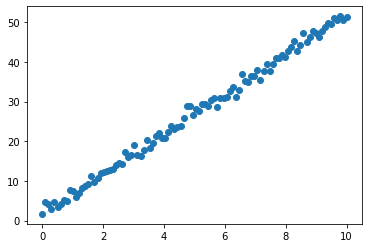

In [4]:
a = 5
b = 2

y = a*x + b
y = y + torch.randn_like(y)

plt.scatter(x, y)

We could do this whole thing with functions, but our life will be easier if we use objects (see [this](https://www.codecademy.com/learn/learn-python/modules/learn-python-introduction-to-classes-u) for more about classes in python)

For our purposes, models should:
1. inherit `torch.nn.Module`
2. have an `__init__` method which initializes the object
3. have a `forward` method which tells you how to transform the input to the output

In [5]:
# pretty much any method you write should have `self` as its first argument (see the course above for why and when you would not want to do that).
class PolyReg(torch.nn.Module):
    def __init__(self, degree=1):
        # this runs the initialization code for torch.nn.Module
        super().__init__()
        if degree == 1:
            # by marking something as a parameter, we're making it clear that this is what we want to update
            self.coeffs = torch.nn.Parameter(torch.rand(2, dtype=torch.float32))

    def forward(self, x):
        return self.coeffs[0] * x + self.coeffs[1]

This is how you create an instance of our general class above.

In [6]:
linreg = PolyReg(1)

Calling `linreg(x)` is the same as calling `linreg.forward(x)` (I think this is only true if we've inherited `torch.nn.Module`)

In [7]:
linreg(x)
linreg.forward(x)

tensor([0.5131, 0.5645, 0.6160, 0.6674, 0.7188, 0.7702, 0.8216, 0.8730, 0.9244,
        0.9758, 1.0272, 1.0786, 1.1300, 1.1814, 1.2328, 1.2842, 1.3356, 1.3870,
        1.4384, 1.4898, 1.5412, 1.5926, 1.6440, 1.6954, 1.7468, 1.7983, 1.8497,
        1.9011, 1.9525, 2.0039, 2.0553, 2.1067, 2.1581, 2.2095, 2.2609, 2.3123,
        2.3637, 2.4151, 2.4665, 2.5179, 2.5693, 2.6207, 2.6721, 2.7235, 2.7749,
        2.8263, 2.8777, 2.9291, 2.9806, 3.0320, 3.0834, 3.1348, 3.1862, 3.2376,
        3.2890, 3.3404, 3.3918, 3.4432, 3.4946, 3.5460, 3.5974, 3.6488, 3.7002,
        3.7516, 3.8030, 3.8544, 3.9058, 3.9572, 4.0086, 4.0600, 4.1114, 4.1629,
        4.2143, 4.2657, 4.3171, 4.3685, 4.4199, 4.4713, 4.5227, 4.5741, 4.6255,
        4.6769, 4.7283, 4.7797, 4.8311, 4.8825, 4.9339, 4.9853, 5.0367, 5.0881,
        5.1395, 5.1909, 5.2423, 5.2937, 5.3452, 5.3966, 5.4480, 5.4994, 5.5508,
        5.6022], grad_fn=<AddBackward0>)

Most functions that accept numpy arrays can also accept tensors, but if the tensor have a gradient attached we have to call `.detach()` first or the function will yell at you. We can tell that `linreg(x)` has a gradient attached because of the `grad_fn=<AddBackwards0>` above. Generally, anything that has interacted with a `torch.nn.Parameter` will have a gradient attached

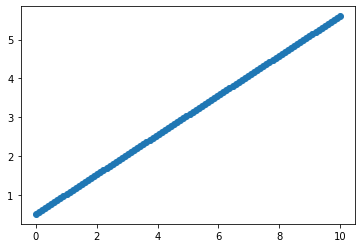

In [8]:
plt.scatter(x, linreg(x).detach())

Now we define our objective function. For now, let's just use mean-squared error:

In [9]:
def obj_func(x, y):
    # we have to use torch.mean (instead of np.mean) but the basic arithmetic symbols (-, +, **, etc) are all fine
    return torch.mean((x-y)**2)

Objective functions should accept your output data and your prediction, and return a scalar. You should write them so they don't make assumptions about the shape of the data they accept, so you can reuse them, and rely on functions like `torch.mean`, `torch.sum`, etc to combine them into a single value

In [10]:
obj_func(y, linreg(x))

tensor(746.1096, grad_fn=<MeanBackward0>)

pytorch has a bunch of optimizers, all under `torch.optim`. you can try the other ones out yourself, but I typically use either `SGD` or `Adam`. SGD is easier to understand (it's stochastic gradient descent), whereas Adam has some bells and whistles on it and typically performs better

all optimizers will require you to set a learning rate (`lr`) and they often have other arguments you can set as well. the learning rate determines the size of the gradient step you take. The larger your learning rate, the more your parameter values will change on each iteration. Too large and you'll be jumping all over the place, unable to actually decrease the gradient -- a good sign of this is if your parameter values and loss are changing wildly. Too small and your parameter values will barely change, so that training will take forever -- if everything looks flat, then your learning rate is too small.

The learning rate and the optimizer's other arguments are called *hyperparameters* and you will have to play around with them to find the best result

In [11]:
optim = torch.optim.Adam([linreg.coeffs], lr=1e-3)

That's all the preliminary work, let's try and fit our model!

you'll typically do this in a `for` loop (to run for some number of steps) or a `while` loop (to run it until your loss gets under some value). I typically use `for` loops, especially during development because I want to avoid the possibility of my code running forever

The core of each loop iteration is

In [12]:
losses = []
param_vals = []
pbar = tqdm(range(10000))
for i in pbar:
    # these next four lines are the core of the loop: 
    # 1. generate the prediction
    y_pred = linreg(x)
    # 2. compute the loss
    loss = obj_func(y, y_pred)
    # 3. compute all the gradients ("run the backwards pass")
    loss.backward()
    # 4. update all the parameters ("step the optimizer")
    optim.step()
    # these next lines are just to keep track of the loss and parameter values over time
    # .item() and .clone().detach() do the same thing -- make sure that we just get the *value*, 
    # rather than the *object* itself (which will update on each loop) (.item() only works for scalars)
    losses.append(loss.item())
    param_vals.append(linreg.coeffs.clone().detach())
    pbar.set_postfix(loss=losses[-1], params=param_vals[-1])
# turn this list of 1d tensors into one 2d tensor
param_vals = torch.stack(param_vals)

100%|█| 10000/10000 [00:28<00:


Let's plot the parameter values and loss over time

Text(0.5, 1.0, 'Loss')

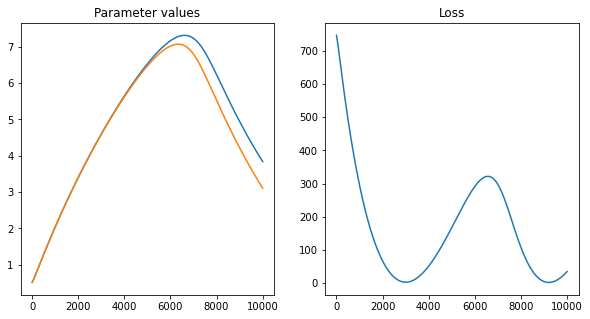

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(param_vals)
axes[0].set_title('Parameter values')
axes[1].plot(losses)
axes[1].set_title("Loss")

And that's the basics of model fitting!

# global parameters

the following small example shows how you can make use of pytorch's [broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html) capabilities to share one global parameter and two local parameters in the same model

for this, we'll say our model consists of two linear regressions, which have the same intercept but different slopes:

In [14]:
a = torch.tensor([2, 5], dtype=torch.float32)
b = torch.tensor([1], dtype=torch.float32)

For broadcasting to work, we need to unsqueeze the slope variable, so that it's 2d:

In [15]:
print(a.shape)
a = a.unsqueeze(1)
print(a.shape)

torch.Size([2])
torch.Size([2, 1])


Then when we multiply it by `x` (which has shape `[100]`), pytorch will automatically broadcast the shapes and so y has shape `[2,100]`:

torch.Size([2, 100])


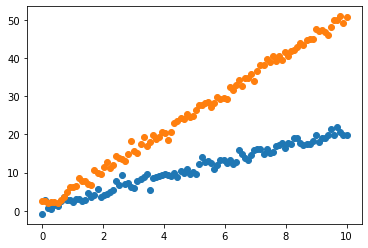

In [16]:
y = a*x + b
y = y + torch.randn_like(y)
print(y.shape)

plt.scatter(x, y[0])
plt.scatter(x, y[1])

And that's all we have to do for our model: make sure that `self.slopes` is 2d and rely on broadcasting to get the right shape:

In [17]:
class PolyReg(torch.nn.Module):
    def __init__(self, degree=1):
        super().__init__()
        if degree == 1:
            # note we don't have to unsqueeze here, we just set the shape directly
            self.slopes = torch.nn.Parameter(torch.rand(2, 1))
            self.intercept = torch.nn.Parameter(torch.rand(1))

    def forward(self, x):
        return self.slopes * x + self.intercept
  
    # you could also do this, which doesn't make use of broadcasting, to get the same result
#     def forward(self, x):
#         data = []
#         for s in self.slopes:
#             data.append(s * x + self.intercept)
#         return torch.stack(data)

In [18]:
linreg = PolyReg(1)
# note that we can use the same objective function, since it works with inputs of any shape
obj_func(y, linreg(x))

tensor(378.7563, grad_fn=<MeanBackward0>)

Pytorch will automatically update the parameters correctly as we go through the training loop! we need to tell the optimizer to care about the two tensors now:

In [19]:
optim = torch.optim.Adam([linreg.slopes, linreg.intercept], lr=1e-3)

And then our loop is the same as before (the only difference is how we add the parameters-in-progress to `param_vals`)

In [20]:
losses = []
param_vals = []
pbar = tqdm(range(1000))
for i in pbar:
    # these next four lines are the core of the loop: 
    # 1. generate the prediction
    y_pred = linreg(x)
    # 2. compute the loss
    loss = obj_func(y, y_pred)
    # 3. compute all the gradients ("run the backwards pass")
    loss.backward()
    # 4. update all the parameters ("step the optimizer")
    optim.step()
    # these next lines are just to keep track of the loss and parameter values over time
    # .item() and .clone().detach() do the same thing -- make sure that we just get the *value*, 
    # rather than the *object* itself (which will update on each loop) (.item() only works for scalars)
    losses.append(loss.item())
    # note that we flatten the slopes and concatenating them with the intercept so that we're adding a 1d tensor on each iteration of the loop
    param_vals.append(torch.cat([linreg.slopes.clone().detach().flatten(), linreg.intercept.clone().detach()]))
    pbar.set_postfix(loss=losses[-1], params=param_vals[-1])
# turn this list of 1d tensors into one 2d tensor
param_vals = torch.stack(param_vals)

100%|█| 1000/1000 [00:03<00:00


Text(0.5, 1.0, 'Loss')

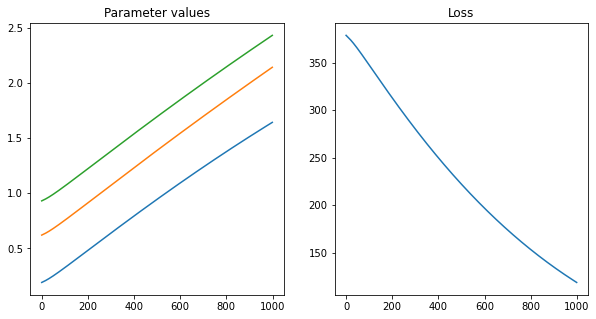

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(param_vals)
axes[0].set_title('Parameter values')
axes[1].plot(losses)
axes[1].set_title("Loss")